In [1]:
#task Exploration of data
"""
check the null values and drop them
1. find the measures of central tendency for assualt& fraud
2. find the measure of spread and shape for - .assualt& fraud
    detect outliers based on data urbanpop using iqr
    detect outlier in urbanpop using z-score
    calculate range, std,varriance of data in urbanpop & assualt.
"""

'\ncheck the null values and drop them\n1. find the measures of central tendency for assualt& fraud\n2. find the measure of spread and shape for - .assualt& fraud\n    detect outliers based on data urbanpop using iqr\n    detect outlier in urbanpop using z-score\n    calculate range, std,varriance of data in urbanpop & assualt.\n'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_excel('data//USArrests.xlsx')
dataset.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Fraud
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [4]:
dataset.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Fraud'], dtype='object')

In [5]:
dataset.describe()

,Murder,Assault,UrbanPop,Fraud
count,50.00000,50.000000,50.00000,50.000000
mean,7.78800,170.760000,663.84000,21.232000
std,4.35551,83.337661,4233.45191,9.366385
min,0.80000,45.000000,32.00000,7.300000
25%,4.07500,109.000000,54.50000,15.075000
50%,7.25000,159.000000,66.00000,20.100000
75%,11.25000,249.000000,77.75000,26.175000
max,17.40000,337.000000,30000.00000,46.000000


In [6]:
dataset[['Assault','Fraud']].median()

Assault    159.0
Fraud       20.1
dtype: float64

In [7]:
dataset[['Assault','Fraud']].mode()

,Assault,Fraud
0,120.0,14.9
1,NaN,16.3


In [11]:
from scipy.stats import iqr, kurtosis, skew
print(iqr(dataset[['Assault','Fraud']],axis=0))

[140.   11.1]


In [10]:
kurtosis(dataset[['Assault','Fraud']],fisher=True)

array([-1.06902005,  0.20189779])

In [12]:
dataset[['Assault','Fraud']].skew()

Assault    0.23441
Fraud      0.80120
dtype: float64

In [14]:
skew(dataset[['Assault','Fraud']])

array([0.22731787, 0.77696132])

In [15]:
from scipy.stats import zscore
score = zscore(dataset[['Assault','Fraud']])

In [16]:
score

,Assault,Fraud
0,0.790787,-0.003451
1,1.118060,2.509424
2,1.493817,1.053466
3,0.233212,-0.186794
4,1.275635,2.088814
5,0.402909,1.883901
6,-0.736484,-1.092723
7,0.815030,-0.585834
8,1.990786,1.150530
9,0.487757,0.492653


<Axes: ylabel='UrbanPop'>

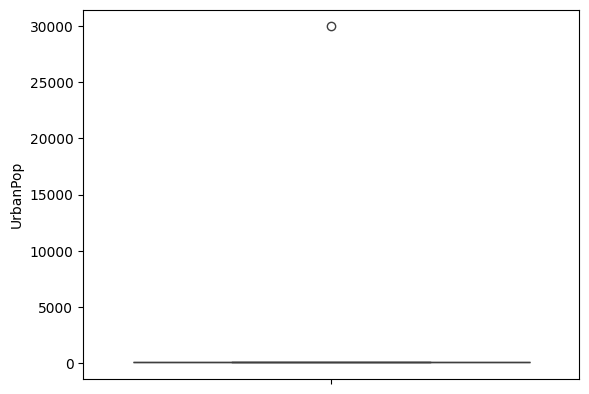

In [19]:
sns.boxplot(data=dataset,y='UrbanPop')

In [22]:
#oulier treatmet
def outlierTreatment(df,column):
    q3 = np.quantile(df[column],0.75)
    q1 = np.quantile(df[column],0.25)
    i_qr = q3-q1
    lowelimit = q1- 1.5*i_qr
    upperlimt = q3+1.5*i_qr
    return df[(df[column]<lowelimit) | (df[column]>upperlimt)]

In [23]:
print(outlierTreatment(dataset,'UrbanPop'))

       Unnamed: 0  Murder  Assault  UrbanPop  Fraud
20  Massachusetts     4.4      149     30000   16.3
